# Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

This notebook was AI-generated and has not been fully verified. Please interpret the code and results with caution.

## Overview
Dandiset 001375 investigates the effect of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity. You can access the complete dataset at [Dandiset 001375](https://dandiarchive.org/dandiset/001375).

In this notebook, we will explore one of the NWB files from the dataset, examining time series data from the first few channels.

## Requirements
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`

These packages are assumed to be already installed.

## Connecting to the DANDI Archive

Let's load the Dandiset using the DANDI API and display some basic metadata.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

Found 3 assets in the dataset

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


## Loading an NWB File

We will load the NWB file `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb` to explore its contents. The URL for this file is:

[NWB File on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Extract metadata and show some key details
print("Session Description:", nwb.session_description)
print("Subject ID:", nwb.subject.subject_id)
print("Age:", nwb.subject.age)
print("Date Created:", nwb.file_create_date[0])

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: mouse running laps in virtual hallway
Subject ID: MS13B
Age: P90D
Date Created: 2025-04-05 16:50:15.663983-07:00


## Visualizing Time Series Data

Below, we visualize the time series data from the first five channels of the NWB file.

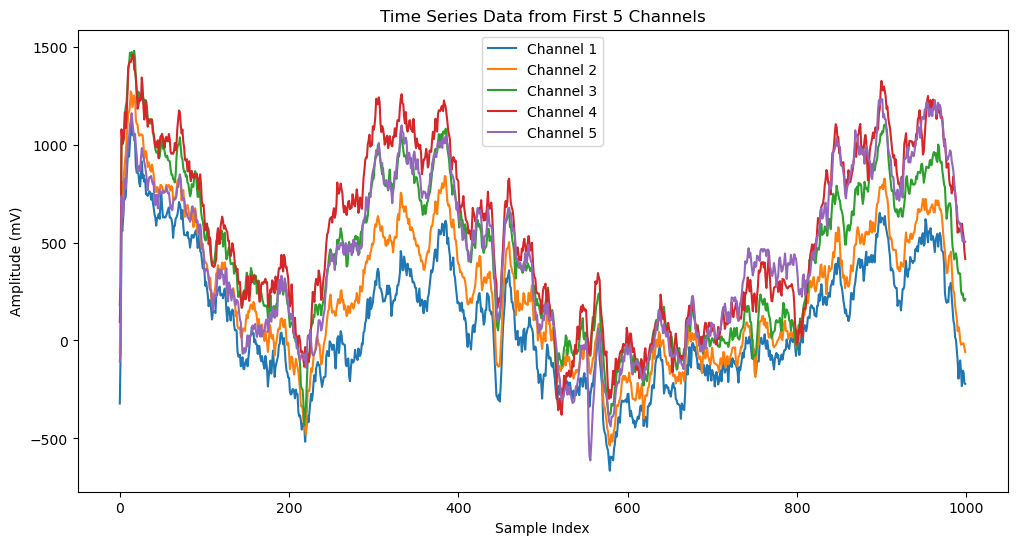

In [3]:
import matplotlib.pyplot as plt

# Extract time series data
time_series = nwb.acquisition["time_series"]

# Load a subset of the data for visualization
num_samples = 1000  # Number of samples to load
data_subset = time_series.data[:num_samples, :5]  # Load first 5 channels

# Plot the data
plt.figure(figsize=(12, 6))
for i in range(data_subset.shape[1]):
    plt.plot(data_subset[:, i], label=f"Channel {i+1}")

plt.xlabel("Sample Index")
plt.ylabel("Amplitude (mV)")
plt.title("Time Series Data from First 5 Channels")
plt.legend()
plt.show()

"""
Closing NWB file to ensure resources are freed
"""
io.close()

## Summary

We've explored a subset of Dandiset 001375, focusing on the time series data from the first few channels of one NWB file. Further analysis could involve exploring additional channels or performing more advanced visualizations and analyses.

Future exploration could examine the relationships between different electrode groups or trial data.